<a href="https://colab.research.google.com/github/Venkat-dev-cloud/Employee-Attrition/blob/main/Attrition_Prediction_using_Gradient_Boost_follow_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else.

This project is based on a hypothetical dataset downloaded from IBM HR Analytics Employee Attrition & Performance. It has 1,470 data points (rows) and 35 features (columns) describing each employee’s background and characteristics; and labelled (supervised learning) with whether they are still in the company or whether they have gone to work somewhere else.

# Expected Outcome
To understand and determine how these factors relate to workforce attrition.

# Kaggle link and dataset
https://www.kaggle.com/patelprashant/employee-attrition

## Importing required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import train test split from sklearn
from sklearn.model_selection import train_test_split

# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

## Ignore Warnings

In [6]:
import warnings
warnings.filterwarnings('ignore')

## See all rows and columns

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set Plot display style

In [36]:
plt.style.use('ggplot')

## Importing Data

In [11]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/Python/Machine Learning 2/Boosting/Gradient Boosting/Gradient Boost/Attrition Prediction/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Understanding and Exploring the data

In [13]:
# Checking the shape
df.shape

(1470, 35)

In [16]:
# Checking the memory consumed by the data
print(f"The dataset uses {round(df.memory_usage().sum()/1024 ** 2, 2)} MB of space")

The dataset uses 0.39 MB of space


In [17]:
# Display memory used by each column in the dataset
df.memory_usage()

Index                         128
Age                         11760
Attrition                   11760
BusinessTravel              11760
DailyRate                   11760
Department                  11760
DistanceFromHome            11760
Education                   11760
EducationField              11760
EmployeeCount               11760
EmployeeNumber              11760
EnvironmentSatisfaction     11760
Gender                      11760
HourlyRate                  11760
JobInvolvement              11760
JobLevel                    11760
JobRole                     11760
JobSatisfaction             11760
MaritalStatus               11760
MonthlyIncome               11760
MonthlyRate                 11760
NumCompaniesWorked          11760
Over18                      11760
OverTime                    11760
PercentSalaryHike           11760
PerformanceRating           11760
RelationshipSatisfaction    11760
StandardHours               11760
StockOptionLevel            11760
TotalWorkingYe

In [18]:
# Checking top 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [25]:
# Checking datatypes and Nullability of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Identify columns with missing information

In [29]:
missing_columns = df.columns[ df.isna().any() ]
print(f"The missing columns in the dataset are: {missing_columns}")

The missing columns in the dataset are: Index([], dtype='object')


There are no columns with missing values in the dataframe

## Checking data imbalance for the target column 'Attrition'

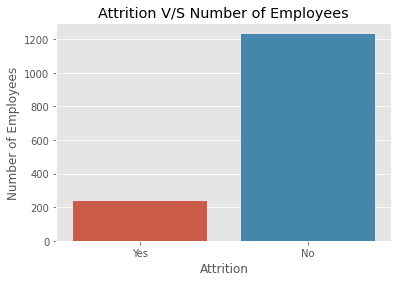

In [37]:
sns.countplot(df['Attrition'])
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Attrition V/S Number of Employees')
plt.show()